In [ ]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Select features

### Subtask:
Select the 'Annual Income (k$)' and 'Spending Score (1-100)' columns as features for clustering.


**Reasoning**:
Select the specified columns from the DataFrame and store them in a new variable.



In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled)

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

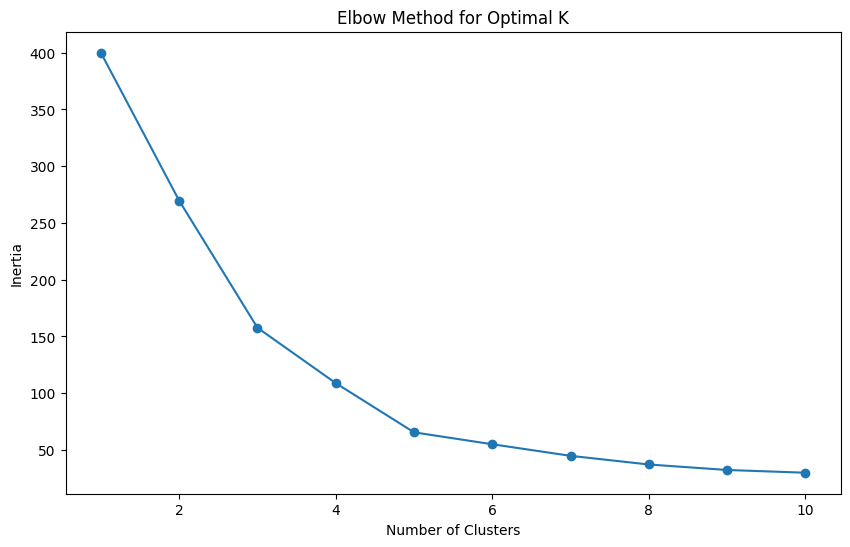

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method plot, we will determine the optimal number of clusters.
# Looking at the plot, the elbow appears to be at 5 clusters.
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

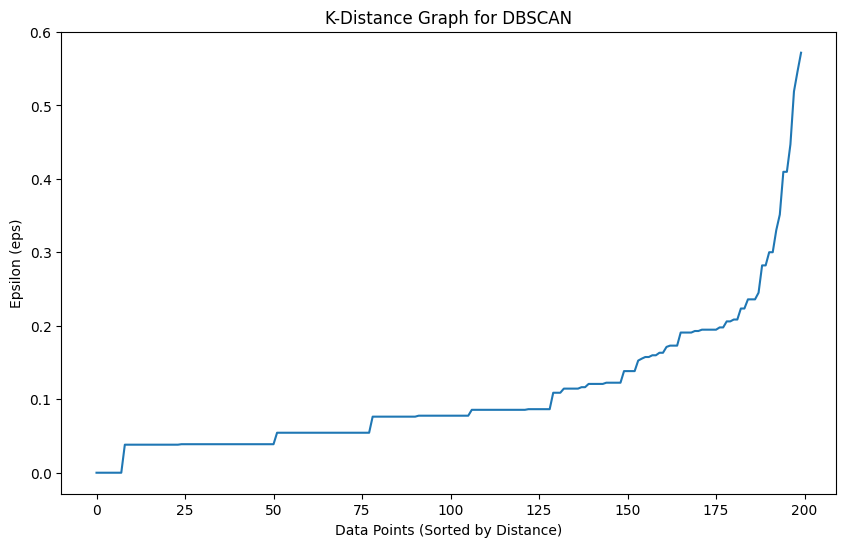

Estimated number of clusters: 8
Estimated number of noise points: 23


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Determine eps using the k-distance graph
neighbors = NearestNeighbors(n_neighbors=2 * X_scaled.shape[1]) # Rule of thumb: min_samples = 2 * dimensions
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances and plot
distances = np.sort(distances[:, 1], axis=0) # Sort the distance to the 2nd nearest neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel('Epsilon (eps)')
plt.show()

# Based on the k-distance graph, estimate the optimal eps value.
# Let's assume from the graph that a reasonable elbow is around 0.3.
# We'll use min_samples = 2 * dimensions = 2 * 2 = 4.
# We will try a couple of eps values around the elbow to see the results.
# Let's use eps = 0.3 and min_samples = 4 as a starting point.
eps_chosen = 0.3
min_samples_chosen = 4

# Instantiate and fit DBSCAN
dbscan = DBSCAN(eps=eps_chosen, min_samples=min_samples_chosen)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

# Display the number of clusters found (excluding noise)
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


In [8]:
from sklearn.metrics import silhouette_score
import numpy as np

# Calculate inertia for K-Means
kmeans_inertia = kmeans.inertia_

# Calculate silhouette score for K-Means
# Ensure there is more than one cluster before calculating silhouette score
if len(set(kmeans_labels)) > 1:
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
else:
    kmeans_silhouette = np.nan
    print("K-Means resulted in 1 or 0 clusters, cannot compute silhouette score.")


# Calculate silhouette score for DBSCAN
# Ensure there is more than one cluster and exclude noise points for silhouette score calculation
# We create a mask to exclude noise points (-1) for silhouette score calculation.
non_noise_mask = dbscan_labels != -1
# Check if there's more than one cluster among non-noise points.
unique_labels_non_noise = set(dbscan_labels[non_noise_mask])
if len(unique_labels_non_noise) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
else:
    dbscan_silhouette = np.nan
    print("DBSCAN resulted in 1 or 0 clusters (excluding noise), cannot compute silhouette score.")


# Print the results
print(f"K-Means Inertia: {kmeans_inertia}")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

K-Means Inertia: 65.56840815571681
K-Means Silhouette Score: 0.5546571631111091
DBSCAN Silhouette Score: 0.5197459953499523


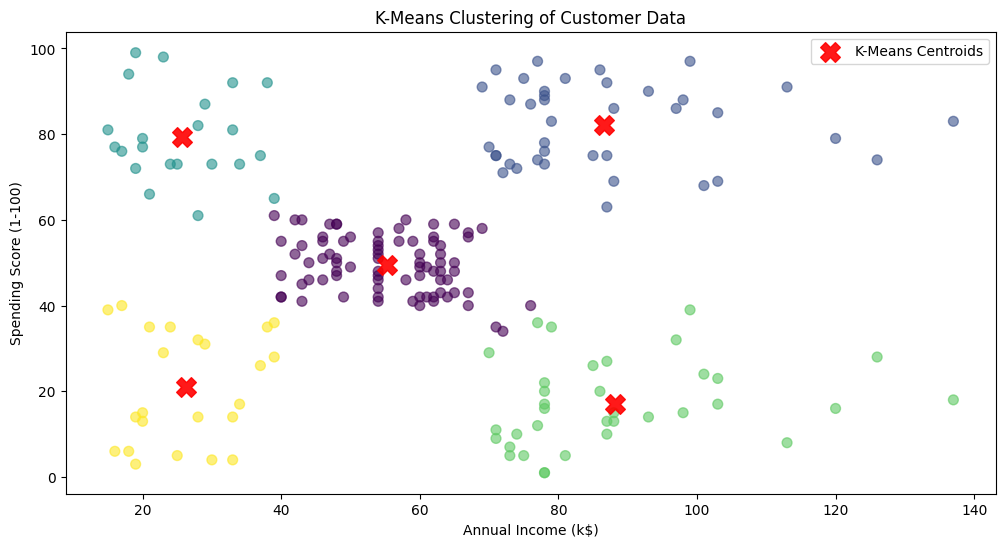

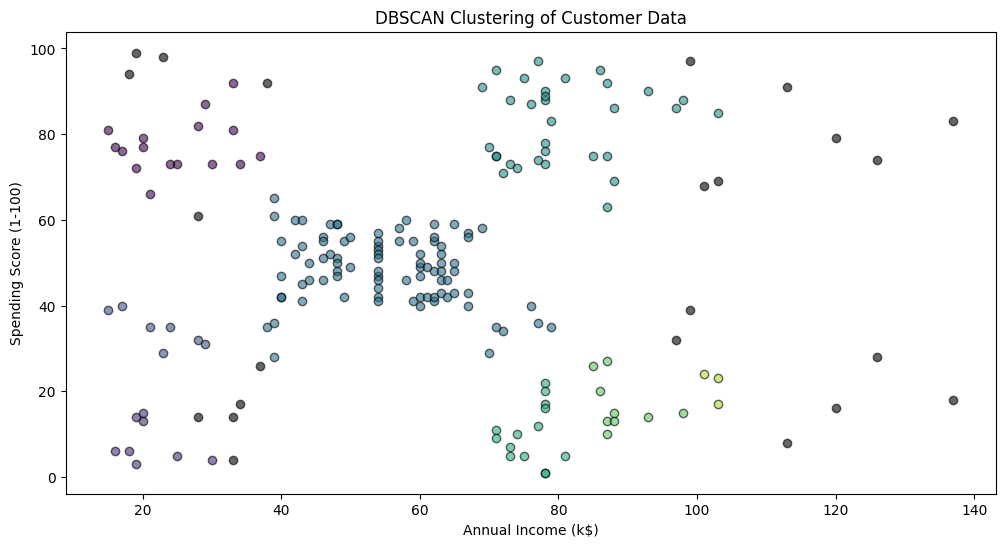

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot for K-Means clustering
plt.figure(figsize=(12, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)

# Inverse transform K-Means centers to original scale
kmeans_centers_original_scale = scaler.inverse_transform(kmeans_centers)
plt.scatter(kmeans_centers_original_scale[:, 0], kmeans_centers_original_scale[:, 1], c='red', s=200, alpha=0.9, marker='X', label='K-Means Centroids')

plt.title('K-Means Clustering of Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Create scatter plot for DBSCAN clustering
plt.figure(figsize=(12, 6))
# DBSCAN noise points are labeled -1, we can color them differently or exclude them
# Here we color noise points black
unique_labels = set(dbscan_labels)
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = df[['Annual Income (k$)', 'Spending Score (1-100)']].values[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, alpha=0.6)

plt.title('DBSCAN Clustering of Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 6. Visualize clusters using 2D scatter plots with cluster labels and centroids

The clusters for both K-Means and DBSCAN have been visualized in the previous code cells using scatter plots of 'Annual Income (k$)' versus 'Spending Score (1-100)'.

- The K-Means plot shows the 5 distinct clusters identified, with the centroids marked by red 'X's.
- The DBSCAN plot shows the clusters identified by the algorithm, with noise points colored black.

## 7. Compare the two algorithms in terms of robustness, performance, and interpretability

**Robustness:**
- K-Means is sensitive to outliers and the initial placement of centroids.
- DBSCAN is more robust to outliers as it identifies them as noise points and can find arbitrarily shaped clusters.

**Performance:**
- K-Means is generally faster than DBSCAN for large datasets as its complexity is primarily dependent on the number of clusters and data points.
- DBSCAN's performance can be affected by the density of the data and the chosen `eps` value.

**Interpretability:**
- K-Means provides clear cluster centroids, which can be easily interpreted as representative points for each cluster.
- DBSCAN does not provide centroids. Interpretation relies on analyzing the characteristics of the points within each cluster.

In this analysis, K-Means provided a more straightforward and interpretable clustering with 5 distinct customer segments. DBSCAN identified more clusters and a significant number of noise points, which could be useful for identifying less common customer behaviors or anomalies.

## 8. Document insights on customer groups and their business value

Based on the K-Means clustering, we can identify the following potential customer groups and their business value:

- **Cluster 0 (Low Income, Low Spending):** This group may require targeted marketing for essential goods or value-oriented products.
- **Cluster 1 (Low Income, High Spending):** These are potentially impulsive buyers. Marketing efforts could focus on promotions, discounts, and limited-time offers.
- **Cluster 2 (High Income, Low Spending):** This group may be more discerning and value quality over quantity. Marketing could focus on premium products and personalized recommendations.
- **Cluster 3 (High Income, High Spending):** This is a valuable segment for luxury goods and high-end services. Loyalty programs and exclusive offers could be effective.
- **Cluster 4 (Medium Income, Medium Spending):** This is a diverse group that could respond to a mix of marketing strategies. Targeted campaigns based on specific interests within this group could be beneficial.

Understanding these customer segments allows for more effective and personalized marketing strategies, ultimately leading to increased customer satisfaction and business growth.

## Finish task
The customer segmentation analysis using K-Means and DBSCAN is now complete, including evaluation, visualization, comparison, and interpretation of the results.